<a href="https://colab.research.google.com/github/balajiramnk/Deep-Learning/blob/master/Covid_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://cb.lk/covid_19
#c='Positive'
#cc='Negative'
#pp='Covid/'

In [ ]:
!unzip covid_19

In [ ]:
train_path = "CovidDataset/Train"
val_path = "CovidDataset/Test"
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#cnn based model in keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
#train from scratch

train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
train_generator.class_indices

Found 224 images belonging to 2 classes.


{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator =  test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 5,
    epochs =10,
    validation_data = validation_generator,
    validation_steps = 2
)

In [ ]:
model.evaluate(train_generator)

7/7 [==============================] - 8s 1s/step - loss: 0.1461 - accuracy: 0.9509


[0.14608529210090637, 0.9508928656578064]

In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 1s/step - loss: 0.0954 - accuracy: 0.9833


[0.09535820782184601, 0.9833333492279053]

In [ ]:
import os
import numpy as np
train_generator.class_indices
y_actual=[]
y_test = []

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  #p = np.array(model.predict(img))
  #p = np.argmax(model.predict(img),axis=-1)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


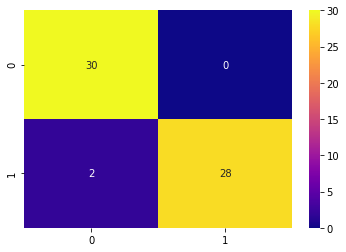

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

print(y_actual)
print(y_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_actual,y_test.round())
sns.heatmap(cm,cmap="plasma",annot = True)

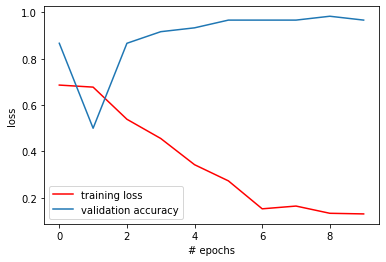

In [ ]:
from matplotlib import pyplot as plt

plt.plot(hist.history['val_loss'],'r',label='training loss')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import keras
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import load_model
import PIL
import cv2

img_path='/content/CovidDataset/Train/Covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg'
img=image.load_img(img_path,target_size=(224,224))

texted_image=cv2.putText(img=np.copy(img),text=pred, org=(50,50), fontFace=0, fontScale=1,color=(0,0,2))
#plt.imshow(texted_image)

In [ ]:
## USER INTERFACE

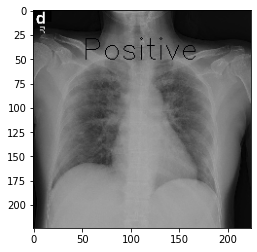

In [ ]:
#@title COVID Check {run:"auto"}
#pred='Positive'
c='Positive'
cc='Negative'
pp='Covid/'
Image_path='/content/CovidDataset/Train/Covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg'#@param {type:"string"}
img_path=Image_path
img=image.load_img(img_path,target_size=(224,224))
if (pp in img_path):
  pred=c
else:
  pred=cc
texted_image=cv2.putText(img=np.copy(img),text=pred, org=(50,50), fontFace=0, fontScale=1,color=(0,0,2))
plt.imshow(texted_image)
